# Import necessary packages

In [ ]:
# Load the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats  
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from datetime import datetime
from google.colab import drive

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PART A

**CONTEXT:** Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

In [ ]:
# 1.A Read all the 3 CSV files as DataFrame and store them into 3 separate variables.
Ndf = pd.read_csv('/content/drive/My Drive/AIML/Supervised Learning/Project/Normal.csv')
Sdf = pd.read_csv('/content/drive/My Drive/AIML/Supervised Learning/Project/Type_S.csv')
Hdf = pd.read_csv('/content/drive/My Drive/AIML/Supervised Learning/Project/Type_H.csv')

In [ ]:
print("1.B Normal csv shape = ", Ndf.shape)
print("1.B Type S csv shape = ", Sdf.shape)
print("1.B Type H csv shape = ", Hdf.shape)

1.B Normal csv shape =  (100, 7)
1.B Type S csv shape =  (150, 7)
1.B Type H csv shape =  (60, 7)


In [ ]:
cols1 = set(Ndf.columns)
cols2 = set(Sdf.columns)
cols3 = set(Hdf.columns)

common_cols = cols1 & cols2 & cols3
print("Common column names:", common_cols)

unique_cols1 = cols1 - cols2 - cols3
unique_cols2 = cols2 - cols1 - cols3
unique_cols3 = cols3 - cols1 - cols2
print("Unique column names in Normal = ", unique_cols1)
print("Unique column names in Type S = ", unique_cols2)
print("Unique column names in Type H = ", unique_cols3)

Common column names: {'P_tilt', 'L_angle', 'S_Degree', 'Class', 'P_radius', 'P_incidence', 'S_slope'}
Unique column names in Normal =  set()
Unique column names in Type S =  set()
Unique column names in Type H =  set()


Observation is - All 3 Dataframe is having all column same. there is NO unique column in any of them. 

**Obeservation** All three Dataframe Normal, Type S and Type H are having 7 column.
There is zero unique column. All 3 is having exact same 7 columns

In [ ]:
print("1.D Data Types : ", Ndf.dtypes , Sdf.dtypes, Hdf.dtypes)

1.D Data Types :  P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


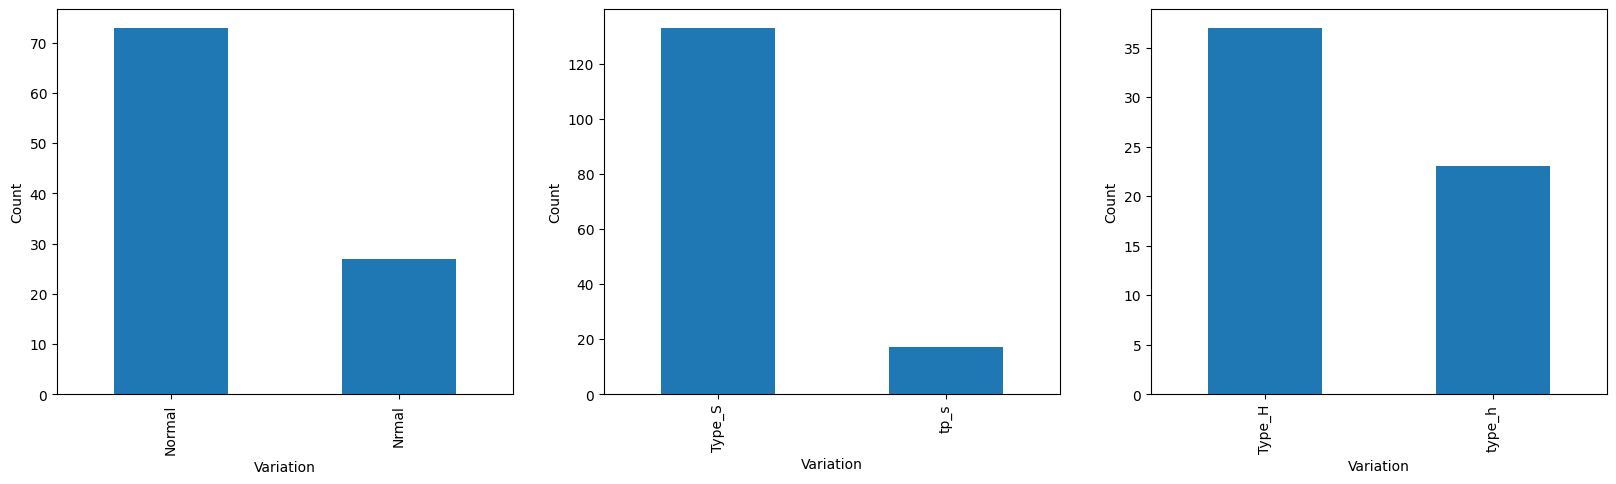

In [ ]:
N_value_counts = Ndf['Class'].value_counts()
S_value_counts = Sdf['Class'].value_counts()
H_value_counts = Hdf['Class'].value_counts()

# frequency counts using a bar chart
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
N_value_counts.plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
S_value_counts.plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
H_value_counts.plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

**1.E Observation** Class feature values are represent in different ways in each DF.

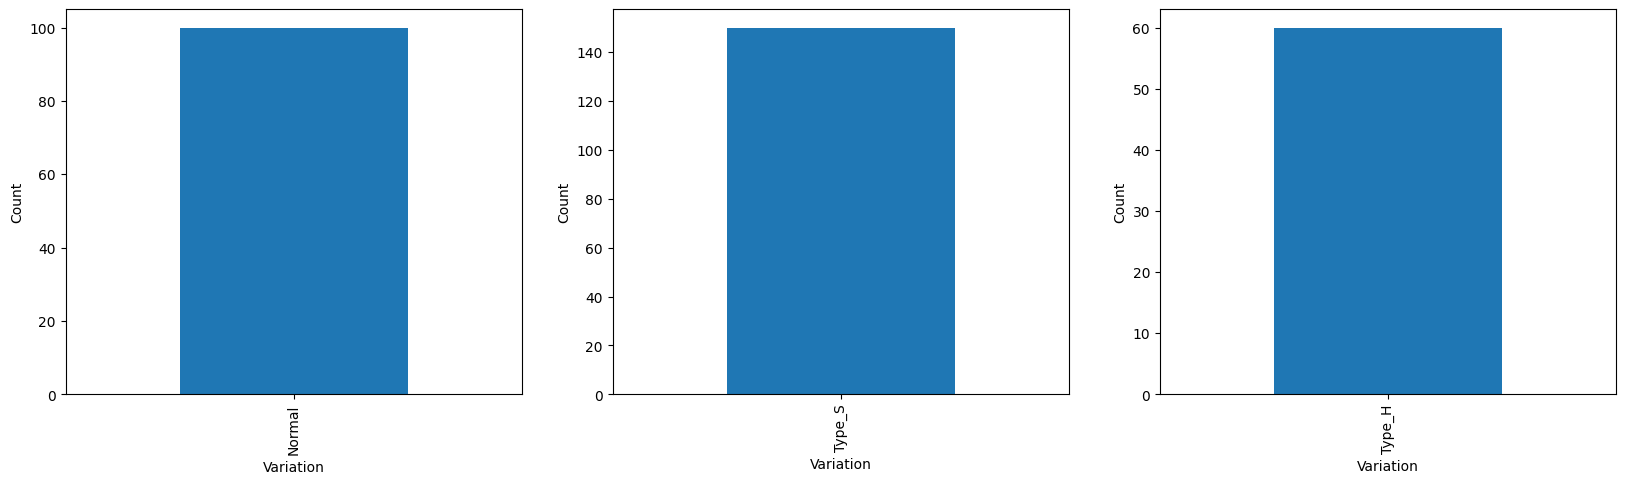

In [ ]:
# replace all variations of 'Class' with 'Class A'
Ndf['Class'] = Ndf['Class'].replace(['Normal', 'Nrmal'], 'Normal')
Sdf['Class'] = Sdf['Class'].replace(['Type_S', 'tp_s'], 'Type_S')
Hdf['Class'] = Hdf['Class'].replace(['Type_H', 'type_h'], 'Type_H')

N_value_counts1 = Ndf['Class'].value_counts()
S_value_counts1 = Sdf['Class'].value_counts()
H_value_counts1 = Hdf['Class'].value_counts()

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
N_value_counts1.plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
S_value_counts1.plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
H_value_counts1.plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()      

**2.A Observation** Class feature value varations are removed.

In [ ]:
resultdf = pd.concat([Ndf, Sdf, Hdf])

print("2.B Concat data of all csv shape = ", resultdf.shape)

2.B Concat data of all csv shape =  (310, 7)


In [ ]:
print("2.C Print 5 random samples of this DataFrame :\n", resultdf.sample(n=5) )

2.C Print 5 random samples of this DataFrame :
      P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
43     49.782121   6.466805  53.000000  43.315316  110.864783  25.335647   
144    56.535051  14.377189  44.991547  42.157862  101.723334  25.773174   
87     45.575482  18.759135  33.774143  26.816347  116.797007   3.131910   
135    71.241764   5.268270  85.999584  65.973493  110.703107  38.259864   
2      44.529051   9.433234  52.000000  35.095817  134.711772  29.106575   

      Class  
43   Type_S  
144  Type_S  
87   Normal  
135  Type_S  
2    Type_S  


In [ ]:
null_percentages = resultdf.isnull().mean() * 100
print("2.D Feature wise % of Null Values: \n", null_percentages)

2.D Feature wise % of Null Values: 
 P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


In [ ]:
# 2.E Checking 5-point summary of the new DataFrame. 
resultdf.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


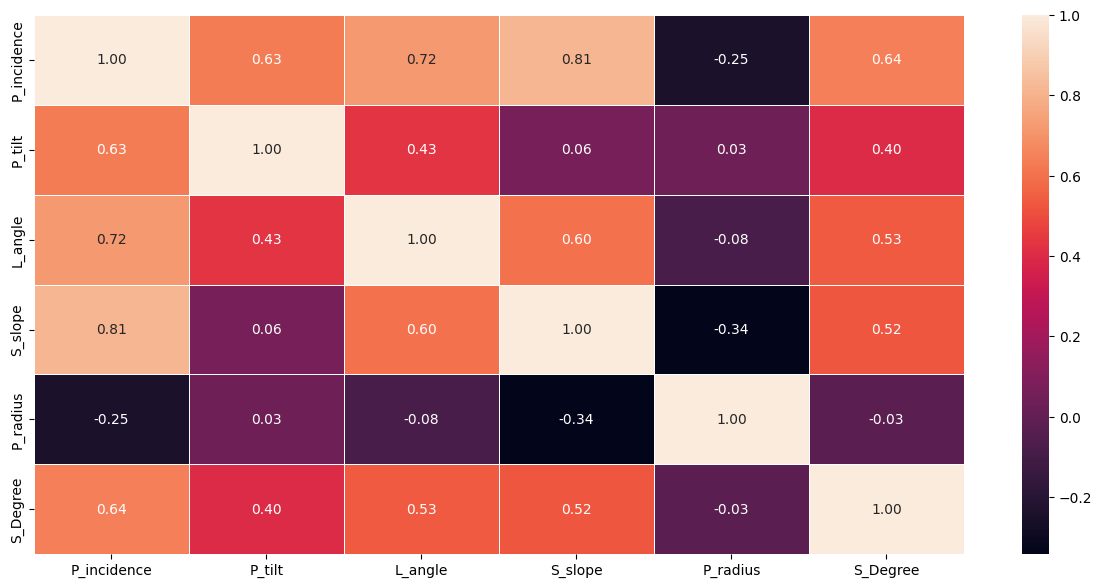

In [ ]:
#3.A Visualize a heatmap to understand correlation between all features
plt.figure(figsize=(15,7))
sns.heatmap(resultdf.corr(), annot=True, linewidths=.5, fmt= '.2f')
plt.show();

In [ ]:
corr_matrix = resultdf.corr()
# value threshold
corr_value = 0.8
strong_corr_features = corr_matrix[corr_matrix >= corr_value].stack().drop_duplicates().index.tolist()

print("3.B Features having stronger correlation with correlation value greater or equal than 0.8 ", strong_corr_features)

3.B Features having stronger correlation with correlation value greater or equal than 0.8  [('P_incidence', 'P_incidence'), ('P_incidence', 'S_slope')]


In [ ]:
corr_value = 0.00

weak_corr_features = corr_matrix[corr_matrix < corr_value].stack().drop_duplicates().index.tolist()

print("3.B Features having weaker correlation with correlation value less than 0.0", weak_corr_features)

3.B Features having weaker correlation with correlation value less than 0.0 [('P_incidence', 'P_radius'), ('L_angle', 'P_radius'), ('S_slope', 'P_radius'), ('P_radius', 'S_Degree')]


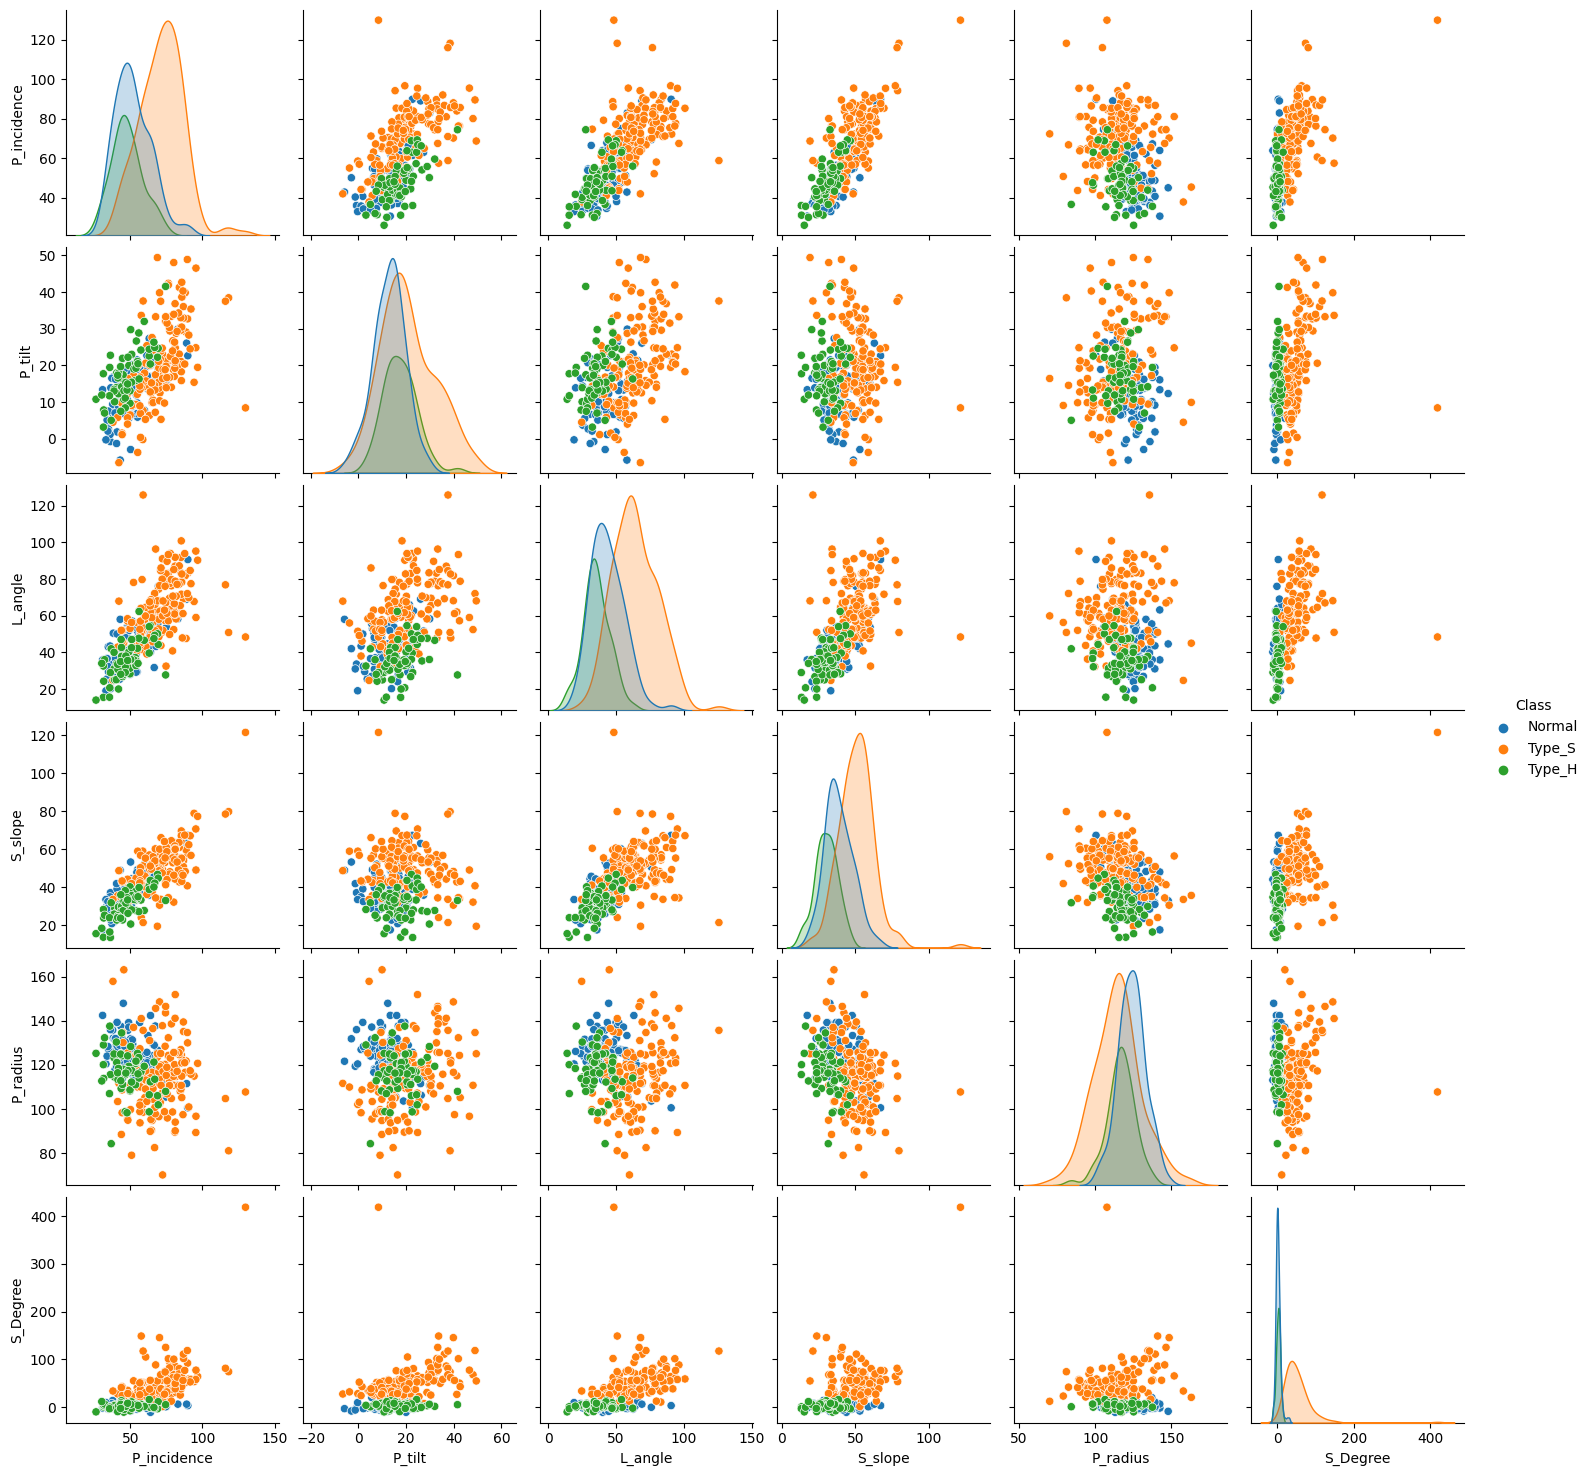

In [ ]:
#3.C Visualize a pairplot with 3 classes distinguished by colors and share insights
sns.pairplot(resultdf, hue='Class');

**3.C Insights from PAIR plot**
1. P_incidence and S_slope seem to be Strong positively correlated for class Type_H and Type_S, but less for normal.

2. S_Degree seems to be negatively correlated with P_radius, L_angle &P-tilt for all classes.

3. There seems to be a clear separation between Type_S & Type_H in terms of S_degree vs P_incidence, L_angle, but class normal seems to overlap with both classes.

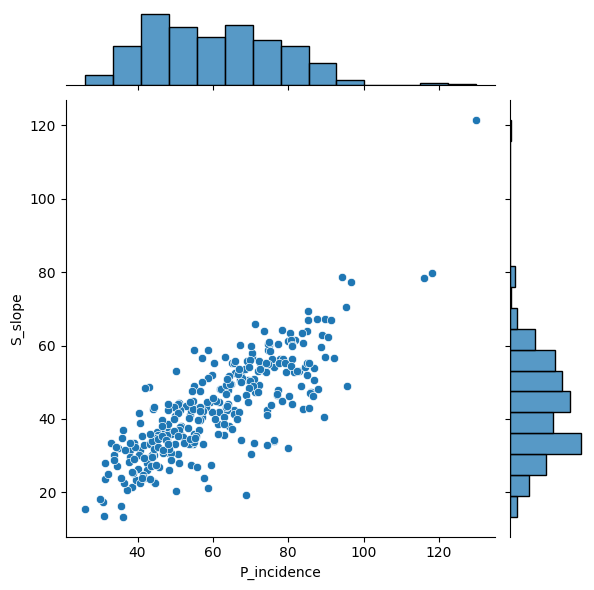

In [ ]:
# plot the jointplot for 'P_incidence' and 'S_slope'
sns.jointplot(x='P_incidence', y='S_slope', data=resultdf);

3.D Insights from jointplot -

1. There seems to be a Strong positive correlation between 'P_incidence' and 'S_slope'. 
2. The scatter plot suggests that relationship between two features is linear, with minor variability
3. The histogram of 'P_incidence' shows roughly normal distribution.

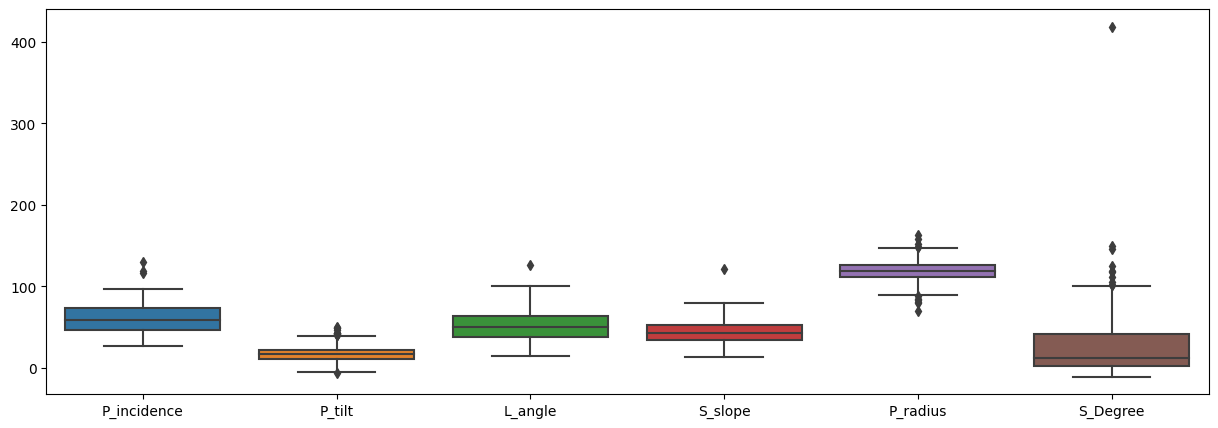

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=resultdf, ax=ax);


3.E Insights from Boxplot -  

1. P_incidence and S-Degree is having outliers

2. S_Degree shows that the 50% value is around 11.8, but there are several extreme outliers on the upper end of the distribution

3. P_tilt shows that the 50% value is around 16.4, and the data is slightly skewed to the right. There are a few outliers on both the lower and upper ends of the distribution. 

4. P_radius having outliers on both the lower and upper ends of the distribution.

In [ ]:
# 4.A split the data into X and Y
X = resultdf.iloc[:, :-1]   
Y = resultdf.iloc[:, -1]   
print("Independent Data for Model \n ", X.head())
print("Dependent data for Model \n", Y.head())

Independent Data for Model 
     P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910
Dependent data for Model 
 0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Class, dtype: object


In [ ]:
# 4.B split the data into train and test sets with an 80:20 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
#4.C create a KNN classifier object with k=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
train_preds = knn.predict(X_train)

print("4.D performance metrics on train Data \n", classification_report(Y_train, train_preds))
print("4.D Confusion Matrix on Train Data \n" , confusion_matrix(Y_train, train_preds));


4.D performance metrics on train Data 
               precision    recall  f1-score   support

      Normal       0.88      0.90      0.89        83
      Type_H       0.86      0.88      0.87        48
      Type_S       0.97      0.95      0.96       117

    accuracy                           0.92       248
   macro avg       0.90      0.91      0.91       248
weighted avg       0.92      0.92      0.92       248

4.D Confusion Matrix on Train Data 
 [[ 75   5   3]
 [  6  42   0]
 [  4   2 111]]


In [ ]:
# Predict on test dataset
test_preds = knn.predict(X_test)

# Generate performance metrics for test dataset
print("4.D performance metrics on test Data \n", classification_report(Y_test, test_preds))
print("4.D Confusion Matrix on test Data \n" , confusion_matrix(Y_test, test_preds));


4.D performance metrics on test Data 
               precision    recall  f1-score   support

      Normal       0.60      0.53      0.56        17
      Type_H       0.43      0.50      0.46        12
      Type_S       1.00      1.00      1.00        33

    accuracy                           0.77        62
   macro avg       0.68      0.68      0.67        62
weighted avg       0.78      0.77      0.78        62

4.D Confusion Matrix on test Data 
 [[ 9  8  0]
 [ 6  6  0]
 [ 0  0 33]]


In [ ]:
#5. Performance Improvement:

#List Hyperparameters to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2,3]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2, hyperparameters, cv=10)

best_model = clf.fit(X,Y)

print('5.A Best leaf_size :', best_model.best_estimator_.get_params()['leaf_size'])
print('5.A Best p:', best_model.best_estimator_.get_params()['p'])
print('5.A Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

5.A Best leaf_size : 1
5.A Best p: 2
5.A Best n_neighbors: 25


In [ ]:
# 5.B Predict on test dataset with best fit model 
test_preds_1 = best_model.predict(X_test)

# Generate performance metrics for test dataset
print("5.B performance metrics on test Data \n", classification_report(Y_test, test_preds_1))
print("5.B Confusion Matrix on test Data \n" , confusion_matrix(Y_test, test_preds_1));


5.B performance metrics on test Data 
               precision    recall  f1-score   support

      Normal       0.73      0.65      0.69        17
      Type_H       0.57      0.67      0.62        12
      Type_S       1.00      1.00      1.00        33

    accuracy                           0.84        62
   macro avg       0.77      0.77      0.77        62
weighted avg       0.84      0.84      0.84        62

5.B Confusion Matrix on test Data 
 [[11  6  0]
 [ 4  8  0]
 [ 0  0 33]]


**Observation** - after using BestFit model 
- Accuracy increase to 0.84 compare to 0.77
- Precision increase from 0.77 to 0.84

**Observation** - 
Parameter - "n_neighbors" is the primary parameter to improve model performance.

# PART B

**CONTEXT:** A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to
increase the conversion ratio to double digit with same budget as per last campaign.

In [ ]:
# 1.A Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. .
df1 = pd.read_csv('/content/drive/My Drive/AIML/Supervised Learning/Project/Data1.csv')
df2 = pd.read_csv('/content/drive/My Drive/AIML/Supervised Learning/Project/Data2.csv')

In [ ]:
print("1.B Data1 csv shape = ", df1.shape)
print("1.B Data2 csv shape = ", df2.shape)

df1cols = set(df1.columns)
df2cols = set(df2.columns)
print("1.B Data1 Column Name = ", df1cols)
print("1.B Data2 Column Name = ", df2cols)

print("1.B Data1 csv Data Type = \n", df1.dtypes)
print("1.B Data2 csv Data Type = \n", df2.dtypes)

1.B Data1 csv shape =  (5000, 8)
1.B Data2 csv shape =  (5000, 7)
1.B Data1 Column Name =  {'CustomerSince', 'ID', 'MonthlyAverageSpend', 'Age', 'HighestSpend', 'HiddenScore', 'Level', 'ZipCode'}
1.B Data2 Column Name =  {'Mortgage', 'LoanOnCard', 'ID', 'FixedDepositAccount', 'CreditCard', 'InternetBanking', 'Security'}
1.B Data1 csv Data Type = 
 ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object
1.B Data2 csv Data Type = 
 ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [ ]:
# 1.c Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

rdf = pd.concat([df1.set_index('ID'), df2.set_index('ID')], axis=1, join='inner')
print("1.C Result csv shape = ", rdf.shape)

1.C Result csv shape =  (5000, 13)


In [ ]:
# Change Datatype of below features to ‘Object’
# ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.
# [Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.]
rdf1 = rdf.astype({'CreditCard': 'object', 'InternetBanking':'object', 'FixedDepositAccount':'object', 'Security':'object','Level':'object', 'HiddenScore': 'object'})

print("1.D Data1 csv Data Type = \n", rdf1.dtypes)

1.D Data1 csv Data Type = 
 Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object


2.A Target variable LoanOnCard unique values=   [nan  1.  0.]
2.A count for each distinct value 
 0.0    4500
1.0     480
NaN      20
Name: LoanOnCard, dtype: int64


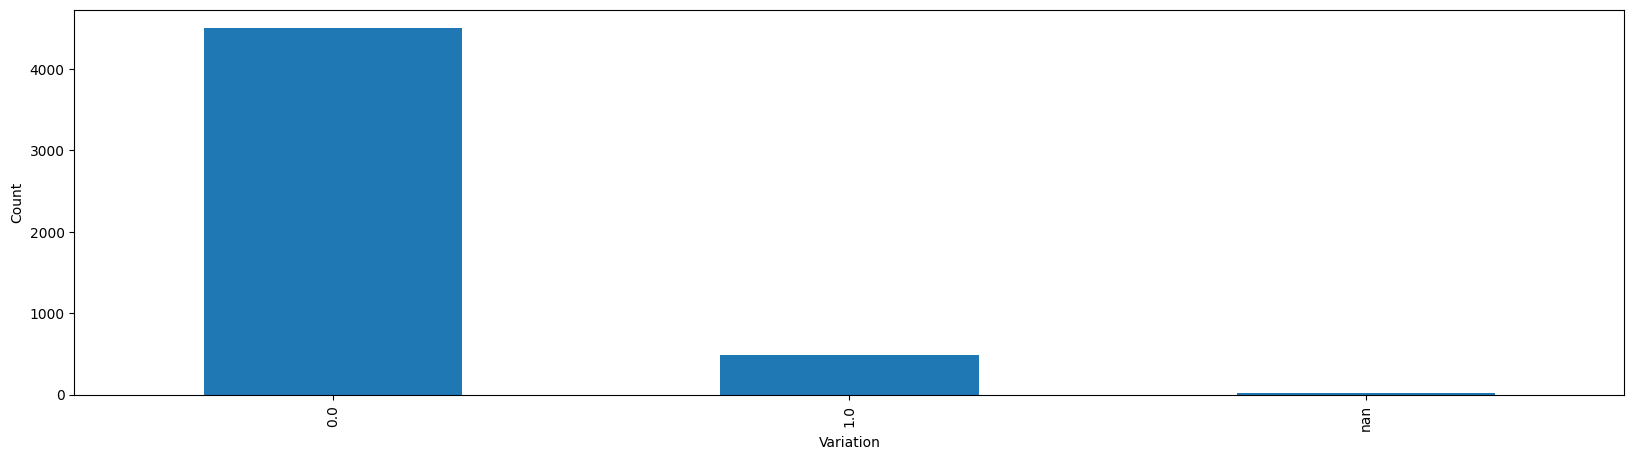

In [ ]:
print("2.A Target variable LoanOnCard unique values=  ", rdf1['LoanOnCard'].unique())

r_value_counts = rdf1['LoanOnCard'].value_counts(dropna=False)
print("2.A count for each distinct value \n", r_value_counts);

# visualize frequency counts using a bar chart
plt.figure(figsize=(20, 5))
r_value_counts.plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show();


**Observation** : 
Target variable LoanonCard is having null values, 20 data points in current is having NAN value.

In [ ]:
# 2.B check Null value
null_percentage = rdf1.isnull().mean() * 100
print("2.B Feature wise % of Null Values: \n", null_percentage)

2.B Feature wise % of Null Values: 
 Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


In [ ]:
# 2.B imputing by mode value
mode_target = rdf1['LoanOnCard'].mode()[0]
rdf1['LoanOnCard'].fillna(mode_target, inplace=True)
null_percentage = rdf1.isnull().mean() * 100
print("2.B Feature wise % of Null Values: \n", null_percentage)

2.B Feature wise % of Null Values: 
 Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64


In [ ]:
categorical_vars = list(rdf1.select_dtypes(include=['object', 'category']).columns)

print("categorical variable in given DF :", categorical_vars)

for var in categorical_vars:
    # check the unique values in the column
    unique_values = rdf1[var].unique()
    print(f"Unique values in {var} column: {unique_values}")


categorical variable in given DF : ['HiddenScore', 'Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard']
Unique values in HiddenScore column: [4 3 1 2]
Unique values in Level column: [1 2 3]
Unique values in Security column: [1 0]
Unique values in FixedDepositAccount column: [0 1]
Unique values in InternetBanking column: [0 1]
Unique values in CreditCard column: [0 1]


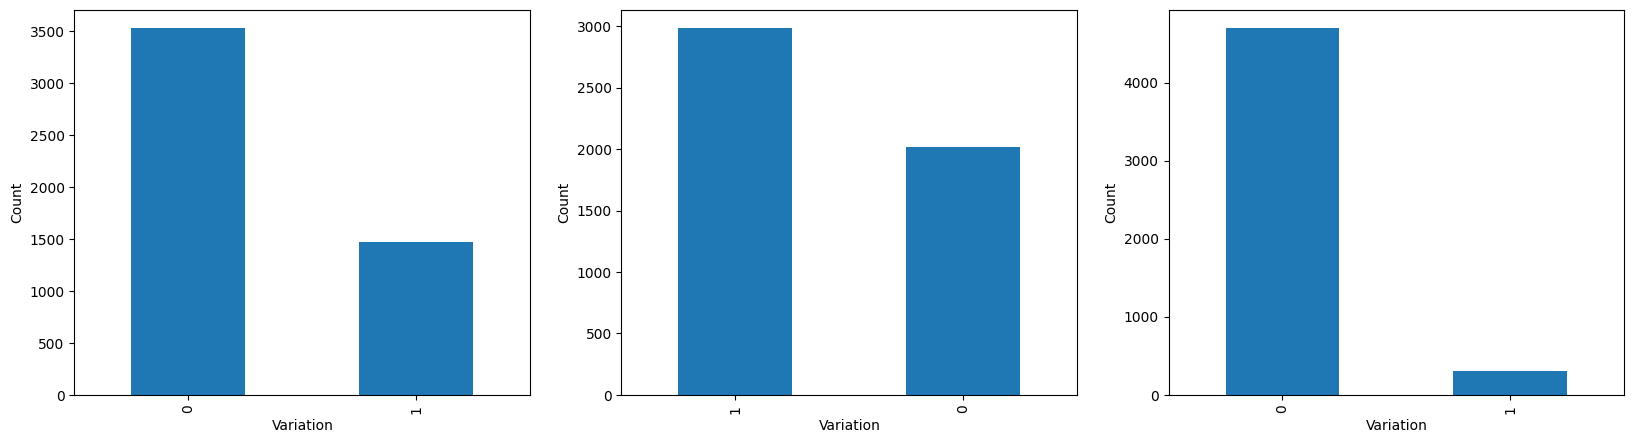

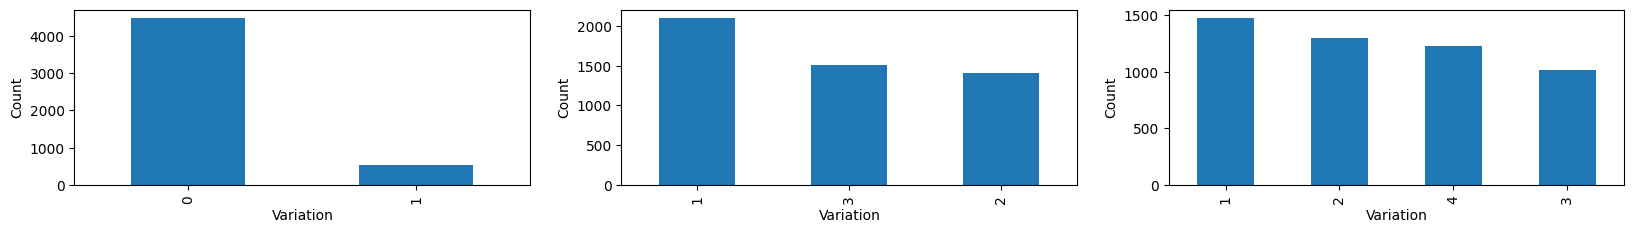

In [ ]:
r1_value_counts = rdf1['CreditCard'].value_counts()
r2_value_counts = rdf1['InternetBanking'].value_counts()
r3_value_counts = rdf1['FixedDepositAccount'].value_counts()
r4_value_counts = rdf1['Security'].value_counts()
r5_value_counts = rdf1['Level'].value_counts()
r6_value_counts = rdf1['HiddenScore'].value_counts()

# frequency counts using a bar chart
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
r1_value_counts.plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
r2_value_counts.plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
r3_value_counts.plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')

plt.figure(figsize=(20, 5))
plt.subplot(2, 3, 1)
r4_value_counts.plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')

plt.subplot(2, 3, 2)
r5_value_counts.plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')

plt.subplot(2, 3, 3)
r6_value_counts.plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [ ]:
# 3.A Split data into X and Y.
# [Recommended to drop ID & ZipCode. LoanOnCard is t
finaldf = rdf1.drop(columns=['ZipCode'], axis =1 )

X = finaldf.drop('LoanOnCard', axis=1)
Y = finaldf['LoanOnCard']

print("Independent Data for Model \n ", X.shape)
print("Target Variable for Model \n", Y.shape)

Independent Data for Model 
  (5000, 11)
Target Variable for Model 
 (5000,)


In [ ]:
# 3.B Split data into train and test. Keep 25% data reserved for testing. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)
print("{0:0.2f}% data is in training set".format((len(X_train)/len(finaldf.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(finaldf.index)) * 100))

75.00% data is in training set
25.00% data is in test set


In [ ]:
# 3.C Train a Supervised Learning Classification base model - Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

3.D Accuracy metrics on test Data : 0.95
3.D Precision metrics on test Data : 0.84
3.D Recall metrics on test Data : 0.55
3.D F1-score metrics on test Data: 0.67
3.D Confusion matrix on test Data :
  [[1128   12]
 [  49   61]]


<Axes: >

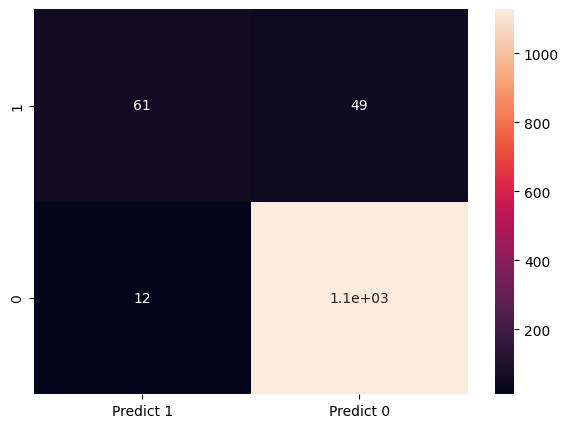

In [ ]:
# 3.D predict the target variable for the test set
y_pred = lr.predict(X_test)

print('3.D Accuracy metrics on test Data :', round(accuracy_score(y_test, y_pred),2))
print('3.D Precision metrics on test Data :', round(precision_score(y_test, y_pred),2) )
print('3.D Recall metrics on test Data :', round(recall_score(y_test, y_pred),2) )
print('3.D F1-score metrics on test Data:', round(f1_score(y_test, y_pred),2))
print('3.D Confusion matrix on test Data :\n ', confusion_matrix(y_test, y_pred))

cm= confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

**Observation** - The confusion matrix

True Positives (TP): we correctly predicted that LoanOnCard 61

True Negatives (TN): we correctly predicted that they don't have LoanOnCard 1128

False Positives (FP): we incorrectly predicted that they do have LoanOnCard (a "Type I error") 12 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have LoanOnCard (a "Type II error") 49 Falsely predict negative Type II error

In [ ]:
#3.E Balance the data using the right balancing technique. [2 Marks]
#i. Check distribution of the target variable
#ii. Say output is class A : 20% and class B : 80%
#iii. Here you need to balance the target variable as 50:50.
#iv. Try appropriate method to achieve the same

n_true = len(finaldf.loc[finaldf['LoanOnCard'] == 1])
n_false = len(finaldf.loc[finaldf['LoanOnCard'] == 0])

print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# create an instance of the RandomUnderSampler class
rus = RandomUnderSampler(random_state=4)

# fit and apply the undersampling to the data
X_resampled, y_resampled = rus.fit_resample(X, Y)

print("3.E. Independent Data for Model \n ", X_resampled.shape)
print("3.E Target Variable for Model \n", y_resampled.shape)

3.E. Independent Data for Model 
  (960, 11)
3.E Target Variable for Model 
 (960,)


In [ ]:
# 3.F Again train the same previous model on balanced data. 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=4)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('3.G Accuracy metrics on test Data :', round(accuracy_score(y_test, y_pred),2))
print('3.G Precision metrics on test Data :', round(precision_score(y_test, y_pred),2) )
print('3.G Recall metrics on test Data :', round(recall_score(y_test, y_pred),2) )
print('3.G F1-score metrics on test Data:', round(f1_score(y_test, y_pred),2))
print('3.G Confusion matrix on test Data :\n ', confusion_matrix(y_test, y_pred))


3.G Accuracy metrics on test Data : 0.88
3.G Precision metrics on test Data : 0.87
3.G Recall metrics on test Data : 0.89
3.G F1-score metrics on test Data: 0.88
3.G Confusion matrix on test Data :
  [[104  16]
 [ 13 107]]


**3.G Observation** between models built with imbalanced and balanced data.

1. The model with imbalanced data achieved a higher accuracy of 0.95 compared to the model with balanced data.
2. Precision of the model with balanced data is higher at 0.87 compared to the model with imbalanced data at 0.84
3. Recall of the model with balanced data is higher at 0.89 compared to the model with imbalanced data at 0.55
4. F1-score of the model with balanced data is also higher at 0.88 compared to the model with imbalanced data at 0.67

Therefore, while the model with imbalanced data has a higher accuracy, the model with balanced data is better overall at predicting positive cases, as evidenced by its higher precision, recall, and F1-score.

Balanced model is better at correctly predicting positive cases and better at correctly identifying positive cases.

In [ ]:
# 4.A Train a base model each for SVM 

svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

print('4.A Accuracy metrics on test Data :', round(accuracy_score(y_test, y_pred),2))
print('4.A Precision metrics on test Data :', round(precision_score(y_test, y_pred),2) )
print('4.A Recall metrics on test Data :', round(recall_score(y_test, y_pred),2) )
print('4.A F1-score metrics on test Data:', round(f1_score(y_test, y_pred),2))
print('4.A Confusion matrix on test Data :\n ', confusion_matrix(y_test, y_pred))

4.A Accuracy metrics on test Data : 0.9
4.A Precision metrics on test Data : 0.88
4.A Recall metrics on test Data : 0.93
4.A F1-score metrics on test Data: 0.9
4.A Confusion matrix on test Data :
  [[104  16]
 [  8 112]]


In [ ]:
# 4.A Train a base model for KNN 

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

print('4.A Accuracy metrics on test Data :', round(accuracy_score(y_test, y_pred),2))
print('4.A Precision metrics on test Data :', round(precision_score(y_test, y_pred),2) )
print('4.A Recall metrics on test Data :', round(recall_score(y_test, y_pred),2) )
print('4.A F1-score metrics on test Data:', round(f1_score(y_test, y_pred),2))
print('4.A Confusion matrix on test Data :\n ', confusion_matrix(y_test, y_pred))

4.A Accuracy metrics on test Data : 0.86
4.A Precision metrics on test Data : 0.86
4.A Recall metrics on test Data : 0.87
4.A F1-score metrics on test Data: 0.86
4.A Confusion matrix on test Data :
  [[103  17]
 [ 16 104]]


In [39]:
#4.B KNN Hyperparameters to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2,3]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_3 = KNeighborsClassifier()
clf = GridSearchCV(knn_3, hyperparameters, cv=5)

best_model_knn = clf.fit(X_resampled,y_resampled)

print("4.B. Best hyperparameters: ", clf.best_params_)

4.B. Best hyperparameters:  {'leaf_size': 6, 'n_neighbors': 15, 'p': 1}


In [40]:
y_pred = best_model_knn.predict(X_test)

print('4.A Accuracy metrics on test Data :', round(accuracy_score(y_test, y_pred),2))
print('4.A Precision metrics on test Data :', round(precision_score(y_test, y_pred),2) )
print('4.A Recall metrics on test Data :', round(recall_score(y_test, y_pred),2) )
print('4.A F1-score metrics on test Data:', round(f1_score(y_test, y_pred),2))
print('4.A Confusion matrix on test Data :\n ', confusion_matrix(y_test, y_pred))

4.A Accuracy metrics on test Data : 0.91
4.A Precision metrics on test Data : 0.88
4.A Recall metrics on test Data : 0.96
4.A F1-score metrics on test Data: 0.92
4.A Confusion matrix on test Data :
  [[104  16]
 [  5 115]]


In [32]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# Define the parameter distribution to search
param_dist = {'C': uniform(0, 5), 'kernel': ['linear'], 'gamma': ['scale', 'auto']}

# Create an instance of the SVM classifier
svm = SVC()

# Create an instance of the RandomizedSearchCV object
rand_search = RandomizedSearchCV(svm, param_distributions=param_dist, cv=5, n_iter=50, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
rand_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", rand_search.best_params_)

# Use the best hyperparameters to fit the model
best_svm = SVC(**rand_search.best_params_)
best_svm.fit(X_train, y_train)

Best hyperparameters:  {'C': 1.589342171408299, 'gamma': 'scale', 'kernel': 'linear'}


SVC(C=1.589342171408299, kernel='linear')

In [34]:
y_pred = best_svm.predict(X_test)

print('4.A Accuracy metrics on test Data :', round(accuracy_score(y_test, y_pred),2))
print('4.A Precision metrics on test Data :', round(precision_score(y_test, y_pred),2) )
print('4.A Recall metrics on test Data :', round(recall_score(y_test, y_pred),2) )
print('4.A F1-score metrics on test Data:', round(f1_score(y_test, y_pred),2))
print('4.A Confusion matrix on test Data :\n ', confusion_matrix(y_test, y_pred))

4.A Accuracy metrics on test Data : 0.88
4.A Precision metrics on test Data : 0.86
4.A Recall metrics on test Data : 0.9
4.A F1-score metrics on test Data: 0.88
4.A Confusion matrix on test Data :
  [[103  17]
 [ 12 108]]


In [35]:
# Define the parameter distribution to search
best_svm_poly  = SVC(kernel='poly')
best_svm_poly.fit(X_train, y_train)

y_pred_poly = best_svm_poly.predict(X_test)

print('4.A Accuracy metrics on test Data :', round(accuracy_score(y_test, y_pred_poly),2))
print('4.A Precision metrics on test Data :', round(precision_score(y_test, y_pred_poly),2) )
print('4.A Recall metrics on test Data :', round(recall_score(y_test, y_pred_poly),2) )
print('4.A F1-score metrics on test Data:', round(f1_score(y_test, y_pred_poly),2))
print('4.A Confusion matrix on test Data :\n ', confusion_matrix(y_test, y_pred_poly))

4.A Accuracy metrics on test Data : 0.85
4.A Precision metrics on test Data : 0.88
4.A Recall metrics on test Data : 0.8
4.A F1-score metrics on test Data: 0.84
4.A Confusion matrix on test Data :
  [[107  13]
 [ 24  96]]


In [36]:
# Define the parameter distribution to search
param_dist = {'C': uniform(0, 5), 'kernel': ['rbf'], 'gamma': ['scale', 'auto']}

# Create an instance of the SVM classifier
svm = SVC()

# Create an instance of the RandomizedSearchCV object
rand_search = RandomizedSearchCV(svm, param_distributions=param_dist, cv=5, n_iter=50, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
rand_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", rand_search.best_params_)

# Use the best hyperparameters to fit the model
best_svm_rbf = SVC(**rand_search.best_params_)
best_svm_rbf.fit(X_train, y_train)

y_pred_rbf = best_svm_rbf.predict(X_test)

print('4.A Accuracy metrics on test Data :', round(accuracy_score(y_test, y_pred_rbf),2))
print('4.A Precision metrics on test Data :', round(precision_score(y_test, y_pred_rbf),2) )
print('4.A Recall metrics on test Data :', round(recall_score(y_test, y_pred_rbf),2) )
print('4.A F1-score metrics on test Data:', round(f1_score(y_test, y_pred_rbf),2))
print('4.A Confusion matrix on test Data :\n ', confusion_matrix(y_test, y_pred_rbf))

Best hyperparameters:  {'C': 3.093975841790633, 'gamma': 'scale', 'kernel': 'rbf'}
4.A Accuracy metrics on test Data : 0.91
4.A Precision metrics on test Data : 0.88
4.A Recall metrics on test Data : 0.94
4.A F1-score metrics on test Data: 0.91
4.A Confusion matrix on test Data :
  [[105  15]
 [  7 113]]


4.C Accuracy metrics on test Data : 0.91
4.C Precision metrics on test Data : 0.88
4.C Recall metrics on test Data : 0.96
4.C F1-score metrics on test Data: 0.92
4.C Confusion matrix on test Data :
  [[104  16]
 [  5 115]]


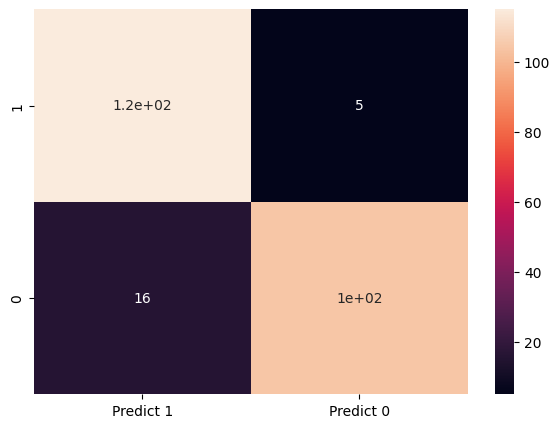

In [42]:
#4.C Evaluation metrics for Best model.
# KNN optmized is best model

y_pred = best_model_knn.predict(X_test)

print('4.C Accuracy metrics on test Data :', round(accuracy_score(y_test, y_pred),2))
print('4.C Precision metrics on test Data :', round(precision_score(y_test, y_pred),2) )
print('4.C Recall metrics on test Data :', round(recall_score(y_test, y_pred),2) )
print('4.C F1-score metrics on test Data:', round(f1_score(y_test, y_pred),2))
print('4.C Confusion matrix on test Data :\n ', confusion_matrix(y_test, y_pred))

cm= confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

**4.D Observation** improvement from bace model to Best Model

1. The KNN model after tuning achieved a higher accuracy of 0.91 compared to the base logistic model 0.88.
2. Precision of the KNN model after tuning is bit improved at 0.88 compared to the base model at 0.87
3. Recall of the KNN model after tuning improved a lot at 0.96 compared to the base model at 0.89
4. F1-score of the KNN model after tuning also higher at 0.92 compared to the base model at 0.88
5. Confusion matrix - 

	True Positives (TP): we correctly predicted that LoanOnCard 115

	True Negatives (TN): we correctly predicted that they don't have LoanOnCard 104

	False Positives (FP): we incorrectly predicted that they do have LoanOnCard (a "Type I error") 16 Falsely predict positive Type I error

	False Negatives (FN): we incorrectly predicted that they don't have LoanOnCard (a "Type II error") 5 Falsely predict negative Type II error


Therefore, tuned KNN model is good on all parameters. Type 2 error also reduced. Model is better at correctly predicting positive cases and better at correctly identifying positive cases.
